#What is Pytorch?

Machine learning/Deep learning Framework

It contains packages such as Torch, Torch.nn, Torch.functional, ...

These packages include modules. For example, torch include tensor, generators, random sampling, and other modules

It provides a whole stack for ML/DL practice from loading data, preprocessing, modelling, deployment in application or cloud.

Pytorch leverages CUDA (parallel computing platform and API by NIVDIA) to run code into GPUs to accelerate computing and processing.

# What is a tesnor? Building Block of Pytorch

Abstractly, tensor is any numerical representation of data.

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators.

Tensors are also optimized for automatic differentiation

In [ ]:
import torch
import numpy as np

# Tensor Creation

In [ ]:
x= torch.empty(1) #initialization
y= torch.empty(3)
z= torch.empty(2,3)
#torch.rand(size)
#torch.zeros(size)
#torch.ones(size)

In [ ]:
# 0 rank/ 0 dim. tensor "Scaler"
scaler= torch.tensor([9])
print(scaler)
print(scaler.item())
print(scaler.ndim)

tensor([9])
9
1


In [ ]:
# 1 rank / 1 dim. "Vector"
vector= torch.tensor([1,2,4])
print(f"shape {vector.shape}, dimension {vector.ndim}, data_type {vector.dtype}")

# to get the size, you can either use
vector.shape
vector.size()

shape torch.Size([3]), dimension 1, data_type torch.int64


torch.Size([3])

In [ ]:
for i in vector:
  print(i)

tensor(1)
tensor(2)
tensor(4)


In [ ]:
#Changing/ Determining dtype of elements in tensor
vector= torch.tensor([1,2,4], dtype= torch.float16)

In [ ]:
vec1= [3,4,5]
vec2= [2,5,9]
vec12= torch.tensor([vec1, vec2])
print(vec12, '\n', vec12.shape)
vec12_col_sum= vec12.sum(dim=0)
print(vec12_col_sum)
vec12_row_sum= vec12.sum(dim=1)
print(vec12_row_sum)

tensor([[3, 4, 5],
        [2, 5, 9]]) 
 torch.Size([2, 3])
tensor([ 5,  9, 14])
tensor([12, 16])


In [ ]:
#row vector
row_vec= torch.tensor([[1,2]])   #[1,2]
print(row_vec.shape)
#col vector
col_vec= torch.tensor([[1],[2]])   #[1
                                  #  2]
print(col_vec.shape)

torch.Size([1, 2])
torch.Size([2, 1])


In [ ]:
# 2 rank, 2nd dim., "Matrix 2d"
data1= torch.tensor([[1,2,3],[45,6,2]])
print(data1.shape)

# 3 rank, 3 dim, "tensor 3d"
data2= torch.tensor([[[1,2,3],[45,6,2]]])
print(data2.shape)

torch.Size([2, 3])
torch.Size([1, 2, 3])


In [ ]:
#using random
ten1= torch.rand((2,3))
print(ten1)
#using empty just to allocate space in memory
ten2= torch.empty(2,3)
print(ten2)
#make a tensor of zeros
ten3= torch.zeros((2,3))
#make a tensor of ones
ten4= torch.ones((4))
print(ten4)


tensor([[0.4528, 0.5709, 0.6087],
        [0.4591, 0.7437, 0.1663]])
tensor([[-1.7700e-31,  3.1802e-41, -1.9344e-31],
        [ 3.1802e-41,  1.1210e-43,  0.0000e+00]])
tensor([1., 1., 1., 1.])


In [ ]:
#operations
x= torch.rand((2,2))
y= torch.rand((2,2))
adding= torch.add(x,y) # or use x+y
subtracting= torch.sub(x,y)
multiply= torch.mul(x,y)
division = torch.div(x,y)
print(x+y)

tensor([[1.2358, 0.6671],
        [1.1473, 0.7229]])


In [ ]:
##If you want to make operations in same place, eg:
x= torch.rand((2,2))
y= torch.rand((2,2))
print(x,y)
y.add_(x) #y+x


In [ ]:
#slicing
vec1= vector[ 1 , : ] #row 1, all columns
vec2= vector[:, 1 ] #col 1, all rows

#reshaping
#tensor.reshape(size)
#tensor.reshape(2,-1) #infer col shape
#tensor.reshape(-1,2) #infer row shape

In [ ]:
#Taking transpose
data= torch.tensor([[1,3,4], [0,9,2]])
print(data.shape)
data_tran= data.t()
print(data_tran.shape)

torch.Size([2, 3])
torch.Size([3, 2])


In [ ]:
#A tensor and its transpose both have same address in memeory
print(data.storage().data_ptr())
print(data_tran.storage().data_ptr())

97476639707392
97476639707392


<ipython-input-12-ce351fbd593c>:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  print(data.storage().data_ptr())


**Tesnor and its transpose: Samething different views**: same tesnor, same address, different strides give different views

**Stride(0)**--> Go on same row from element to another

**Stride(1)**--> Go on same column from element to another

In [ ]:
#pytorch sperates storage and the view it gives
print(f"data {data}")
print(f"data_tran {data_tran}")
print("Before Transpose ", f"data.stride(0): {data.stride(0)}",f"data.stride(1): {data.stride(1)}")
print("After Transpose", f"data_tran.stride(0): {data_tran.stride(0)}",f"data_tran.stride(1): {data_tran.stride(1)}")

data tensor([[1, 3, 4],
        [0, 9, 2]])
data_tran tensor([[1, 0],
        [3, 9],
        [4, 2]])
Before Transpose  data.stride(0): 3 data.stride(1): 1
After Transpose data_tran.stride(0): 1 data_tran.stride(1): 3


# Broadcasting
Creating higher dimensional data.

This is needed to match the dimensions of differently shaped arrays in order to be able to perform further operations on those arrays

Broadcasting Semantics are common between numpy and pytorch



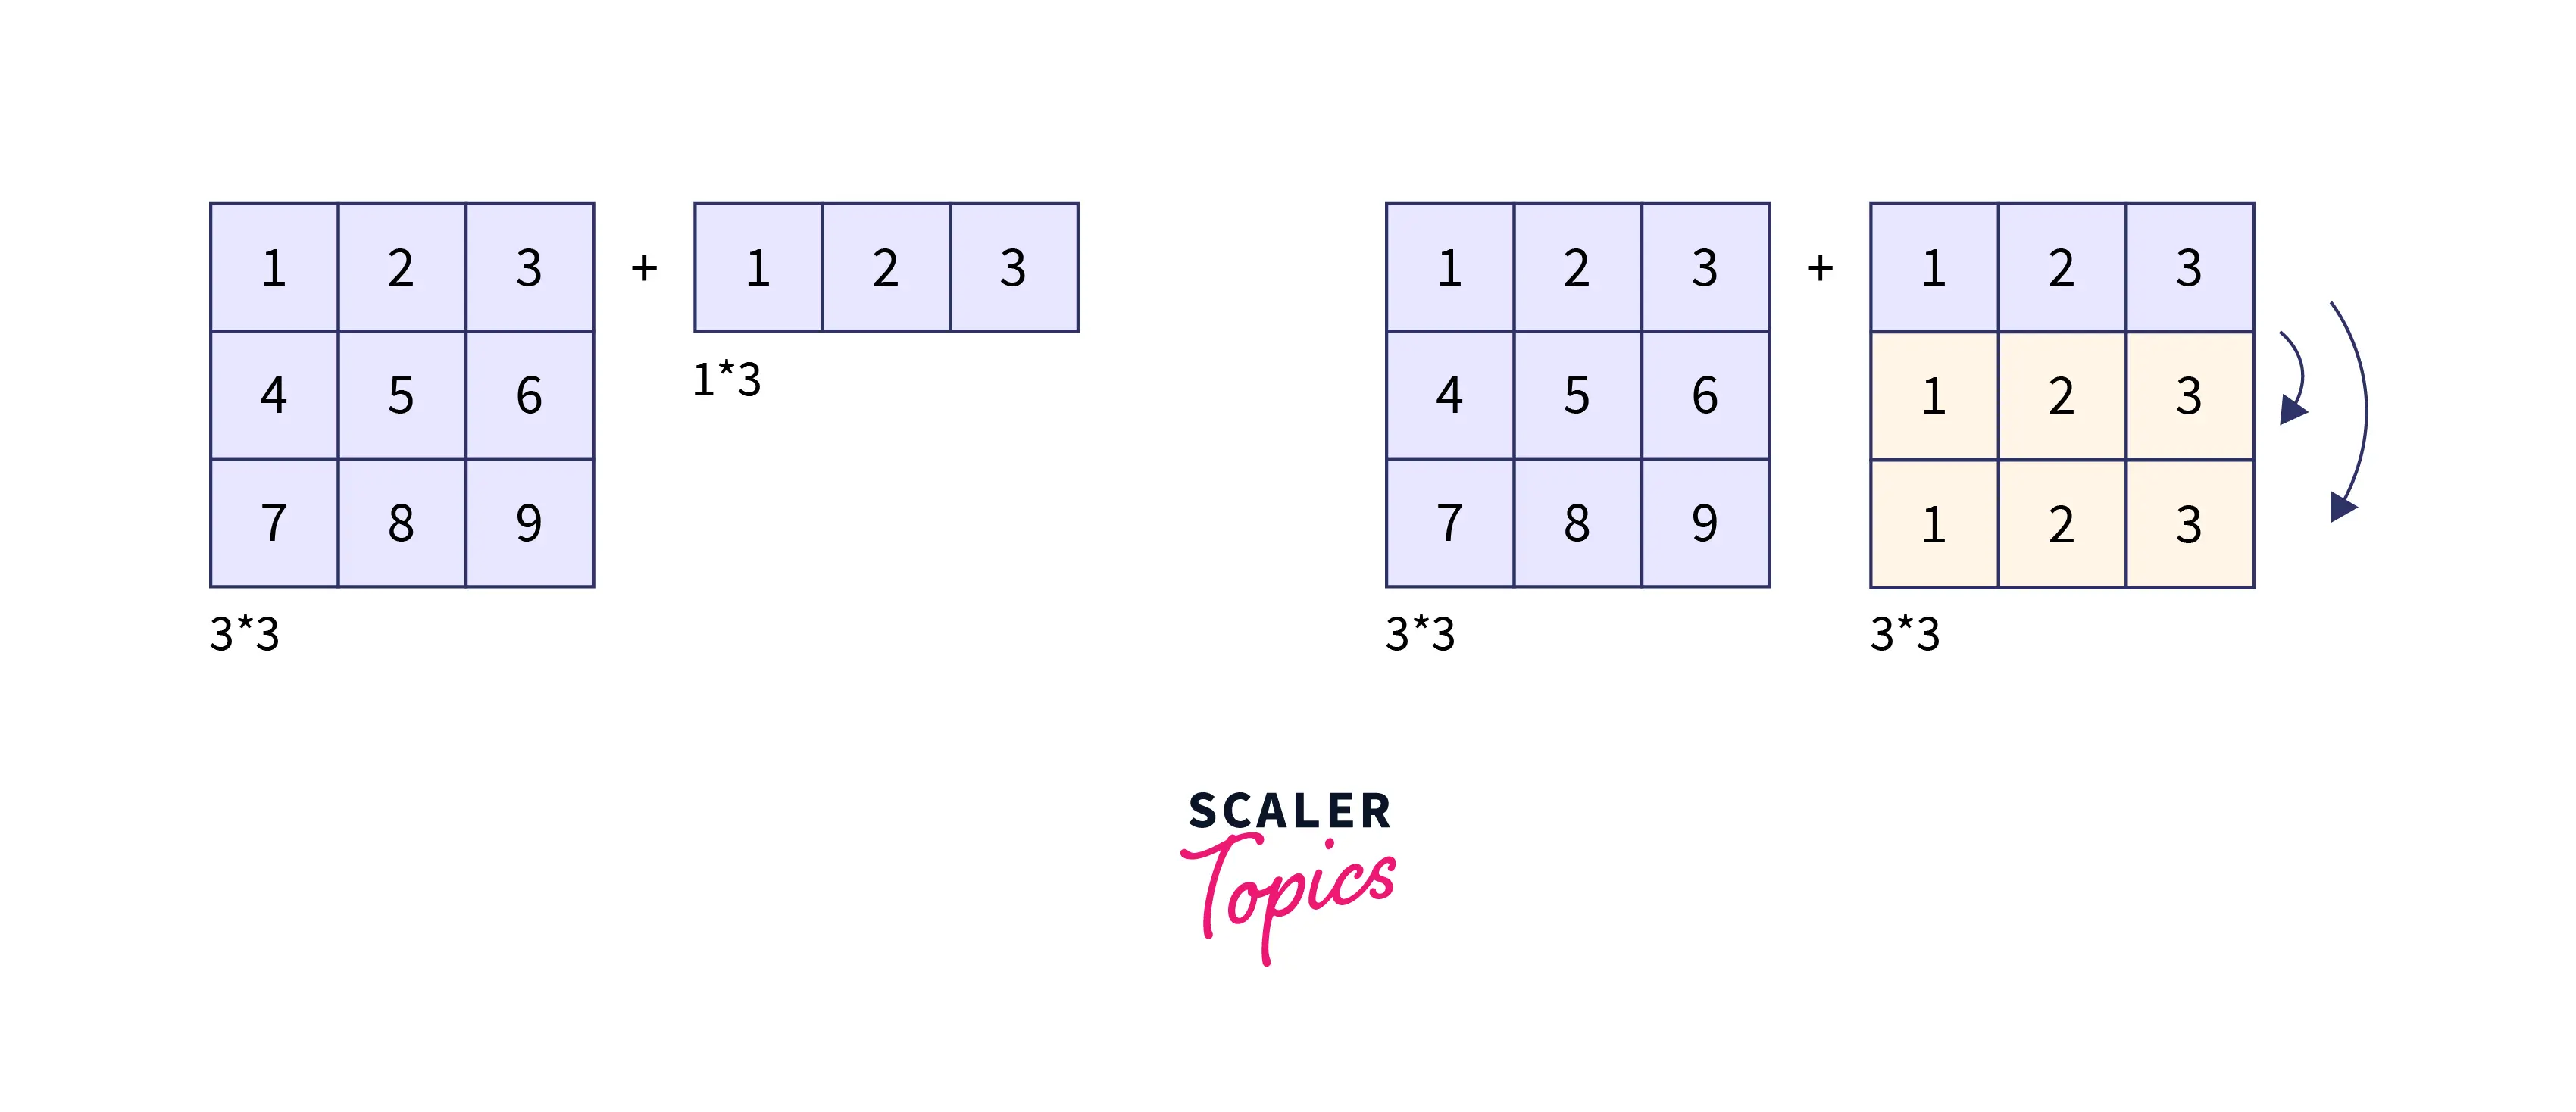

In [ ]:
data= np.random.random_sample((100,2))
data= torch.tensor(data)
print(data.shape)
data= data.broadcast_to(size=(100,100,2))
print(data.shape)


torch.Size([100, 2])
torch.Size([100, 100, 2])


**Numpy and Pytorch**

If not working on gpu, numpy version of the pytorch array will have same address as pytorch array

In [ ]:
# tensor to numpy array
arr= torch.tensor([2,3,4])
np_arr= arr.numpy()
# on CPU, tensors and numpy arrays share same location in memeory.
#if working on cpu, np_arr and arr have same address, so changing one will affect the other

In [ ]:
#numpy array to tensor
arr= np.array([2,4,4])
ten_arr= torch.from_numpy(arr)
#OR
ten_arr = torch.tensor(arr)

In [ ]:
'''HOW TO BUILD NEURAL NETWORK WITH PYTORCH LIBRARY'''
#Generate Data
#Do the forward path: define ypur parameters, predict function, and loss function
#set requires_grad to true for the parameters and retain them
#Do optimization (backward path): loss.backward()
#for validation loop or updataing parameters use "with torch.no_grad()"
# at the end of each loop, zero the gradients of parameters